# Loading my own images for DNN personal practice

Mohammed Agha, November 2020

In [2]:
# importing libraries

# to iterate through directories
import os

# to do some image operations
import cv2

import matplotlib.pyplot as plt
import random
import math
import numpy as np


%matplotlib inline
np.random.seed(3)

The next step is to define the directory and the classes that we need our model to classify.

In [3]:
# Define our working directory
DATA_DIR = os.getcwd()
print(DATA_DIR)

# Define our classes
CLASSES = ["M", "NM"]

/Users/mohammedagha/Desktop/Python sandbox/pictures


In [4]:
# an idea for later update
# train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

Now, lets read our images. We will first create an empty list and populate it with the images and the labels.
This is an example for a supervised learning classifier, thus we need the labels for each image.

In [5]:
# Define an empty list 
train_set_x_orig = []

# Define a function to populate the list with each image and its repective label
def create_training_data():
    for label in CLASSES:
        path = os.path.join(DATA_DIR, label)
        
        Class_num = CLASSES.index(label)
        
        for img in os.listdir(path):
            try:
                img_array = cv2.resize(cv2.imread(os.path.join(path, img)),(96,96))
                train_set_x_orig.append([img_array, Class_num])
            except Exception as e:
                pass
            

            

create_training_data()

Before we proceed, we need to shuffle our training data 

In [19]:
random.shuffle(train_set_x_orig)

Up to this point, our training set is of type list, to be able to process it, we need it to be of type np.array

We will create two lists, X and Y. X will contain the features while Y will contain the label of the respective image. 

In [55]:
X = []
Y = []

for feature, label in train_set_x_orig:
    X.append(feature)
    Y.append(label)

X = np.array(X).reshape(-1, 96,96,3)
Y = np.array(Y)
print(Y)
Y = np.reshape(Y, (1,X.shape[0]))

print(X.shape)
print(Y.shape)

[0 1 1 1 0 1 1 1 1 0 1 0]
(12, 96, 96, 3)
(1, 12)


In [56]:
print(Y)

[[0 1 1 1 0 1 1 1 1 0 1 0]]


# Model Building

We will start by viewing a couple of images by changing the index

Y = [1]


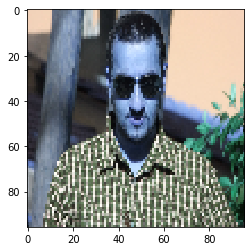

In [60]:
# Example of a picture
index = 5
plt.imshow(X[index])
print ("Y = " + str(Y[:,index]))



In [62]:
# Get some info
m = len(X)
num_pix = X.shape[1]

# Sanity checks
print ("Number of training examples: m = " + str(m))
print ("Height/Width of each image: num_pix = " + str(num_pix))
print ("Each image is of size: (" + str(num_pix) + ", " + str(num_pix) + ", 3)")
print ("training set X (Features) shape: " + str(X.shape))
print ("training set Y (Labels) shape: " + str(Y.shape))


# Flatten the training and test images
X_train_flatten = X.reshape(X.shape[0], -1).T

print ("X_train_flatten shape: " + str(X_train_flatten.shape))
print ("sanity check after reshaping: " + str(X_train_flatten[0:5,0]))



# Normalize image vectors
# As we are using colored images, red, green and blue channels (RGB) should be specified for each pixel, 
# hence, each pixel is a vector of three numbers ranging from 0 to 255 thus we divied by 255 to standardize images

X_train = X_train_flatten/255.

Number of training examples: m = 12
Height/Width of each image: num_pix = 96
Each image is of size: (96, 96, 3)
training set X (Features) shape: (12, 96, 96, 3)
training set Y (Labels) shape: (1, 12)
X_train_flatten shape: (27648, 12)
sanity check after reshaping: [129  84  70 131  86]


Importing TensorFlow libraries

In [74]:
#import tensorflow as tf
#from tensorflow.python.framework import ops

# Since i am using tf.v2.0, it does not have the attribute placeholder, thus i am using the below temp solution
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

**The model** will be *LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX*. 
Our model here only has 2 classes to classify examples into, however, the final SIGMOID output layer (**which is normally used for binary classification**) has been converted to a SOFTMAX. A SOFTMAX layer generalizes SIGMOID to when there are more than two classes. 

We will first create place holders for X and Y. We will do this in TF using the following function:

In [75]:
def create_placeholders(n_x, n_y):
    """
    This function creates the placeholders for the TF session
    
    Arguments: 
     - n_x: Size of an image vector (num_pix * num_pix * 3), in our case its 27648
     - n_y: number of classes, in our case 2 classes 0 or 1
     
    Returns:
     - X: placeholder for the data input, of shape [n_x, None] and dtype "tf.float32"
     - Y: placeholder for the input labels, of shape [n_y, None] and dtype "tf.float32"
    
    Tips: (learned from Andrew Ng)
    - Use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """
    
    X = tf.placeholder(tf.float32, [n_x, None], name = "X")
    Y = tf.placeholder(tf.float32, [n_y, None], name = "Y")
    
    return X, Y

Let's try this function

In [79]:
X, Y = create_placeholders(27648, 2)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X:0", shape=(27648, ?), dtype=float32)
Y = Tensor("Y:0", shape=(2, ?), dtype=float32)
